![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Actualizar los paquetes del código


In [2]:
!pip uninstall matplotlib
!pip install matplotlib
!pip install "numpy<2"



Found existing installation: matplotlib 3.10.1


error: uninstall-no-record-file

× Cannot uninstall matplotlib 3.10.1
╰─> The package's contents are unknown: no RECORD file was found for matplotlib.

hint: You might be able to recover from this via: pip install --force-reinstall --no-deps matplotlib==3.10.1



   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------  15.5/15.5 MB 80.9 MB/s eta 0:00:01
   ---------------------------------------- 15.5/15.5 MB 61.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


  You can safely remove it manually.
  You can safely remove it manually.


In [ ]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, f1_score, r2_score
from sklearn.utils import resample


In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

Análisis descriptivo:



La variable season toma valores del 1 al 4, correspondientes a categorías de temporada definidas en el conjunto de datos.

Se observa una variación significativa en el promedio de bicicletas alquiladas según la temporada.

El valor más bajo corresponde a la temporada 1, con un promedio cercano a 116 alquileres.

El valor más alto se encuentra en la temporada 3, con un promedio de aproximadamente 234 alquileres.

La diferencia entre el promedio máximo y mínimo es de alrededor de 118 unidades, lo cual sugiere un comportamiento diferente de los usuarios entre temporadas.

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

Análisis descriptivo:


La variable hour representa cada hora del día, en formato de 24 horas.

El uso promedio de bicicletas varía considerablemente a lo largo del día.

Las horas entre la madrugada y la mañana temprano (por ejemplo, 2:00 a.m. a 5:00 a.m.) tienen los promedios más bajos.

Se observan aumentos notables en horas específicas como las 8:00 a.m., 5:00 p.m. y 6:00 p.m., donde los promedios superan las 300 bicicletas alquiladas.

El valor promedio más alto se presenta a las 5:00 p.m., con aproximadamente 469 alquileres.

Estos resultados permiten identificar patrones de mayor y menor uso a lo largo del día.

In [6]:
bikes.groupby('season')['total'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


Interpretacion del analisis anterior:

La cantidad de registros por temporada es similar (alrededor de 2700 observaciones por grupo).

La media más alta se presenta en la categoría 3 con un promedio de 234 bicicletas alquiladas, mientras que la media más baja está en la categoría 1 con un promedio de 116.

La desviación estándar también aumenta con la media, indicando mayor dispersión en los valores donde el promedio es más alto.

El valor mínimo es 1 en todas las temporadas, lo que sugiere que siempre hay al menos una instancia de alquiler muy bajo.

El percentil 50 (mediana) y los percentiles 25% y 75% muestran cómo se distribuyen los datos dentro de cada temporada. Por ejemplo, en la temporada 3, el 50% de los datos está por debajo de 195 bicicletas alquiladas, y el 75% está por debajo de 347.

Los valores máximos varían entre 801 y 977 bicicletas alquiladas, indicando los picos más altos registrados por temporada.

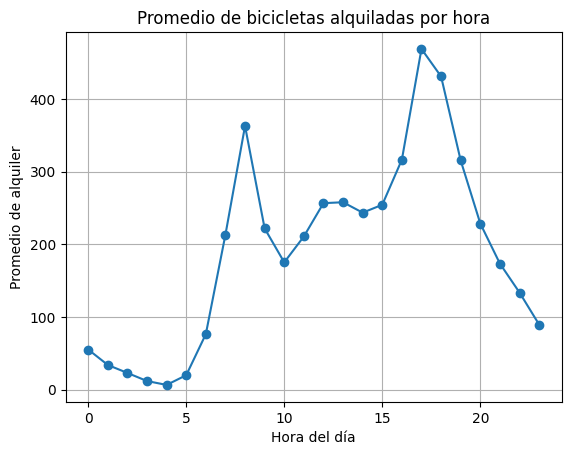

In [ ]:
bikes.groupby('hour')['total'].mean().plot(kind='line', marker='o')
plt.title('Promedio de bicicletas alquiladas por hora')
plt.xlabel('Hora del día')
plt.ylabel('Promedio de alquiler')
plt.grid(True)
plt.show()


Entre las 00:00 y 05:00 horas, los promedios son bajos, con un mínimo cercano a las 04:00.

A partir de las 06:00, el promedio empieza a aumentar significativamente.

Se identifica un primer pico pronunciado alrededor de las 08:00, seguido de una disminución paulatina.

A partir de las 12:00 horas, los valores vuelven a incrementarse, alcanzando el máximo absoluto a las 17:00.

Luego, el promedio comienza a descender gradualmente desde las 18:00 hasta el final del día.


El gráfico evidencia una distribución bimodal, con dos picos claros en la mañana y en la tarde.

Este comportamiento sugiere una posible concentración del uso de bicicletas en franjas horarias específicas, lo cual puede estar relacionado con patrones de actividad diaria.


Las horas intermedias presentan promedios más estables, sin alcanzar los extremos de los picos.




In [8]:
bikes.groupby('season')['total'].quantile([0.25, 0.5, 0.75])


season      
1       0.25     24.0
        0.50     78.0
        0.75    164.0
2       0.25     49.0
        0.50    172.0
        0.75    321.0
3       0.25     68.0
        0.50    195.0
        0.75    347.0
4       0.25     51.0
        0.50    161.0
        0.75    294.0
Name: total, dtype: float64


En todas las temporadas, el valor del percentil 75 es notablemente mayor que el del percentil 25, lo que indica una distribución dispersa de los valores.

La temporada 3 presenta los valores más altos en todos los percentiles, lo que sugiere que la mayoría de los días de esa temporada registran más alquileres en comparación con otras.

En la temporada 1, los valores son más bajos en los tres percentiles, lo cual sugiere menor actividad en la mayoría de los días de ese grupo.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

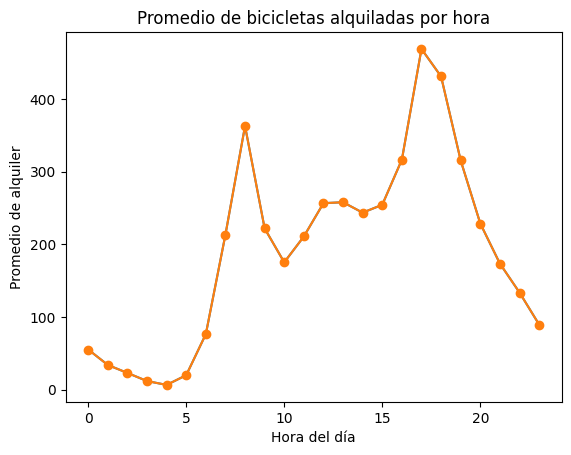

In [ ]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"

bikes.groupby('hour')['total'].mean().plot(
    title='Promedio de bicicletas alquiladas por hora',
    xlabel='Hora del día',
    ylabel='Promedio de alquiler',
    marker='o'
)

import matplotlib.pyplot as plt
plt.show()

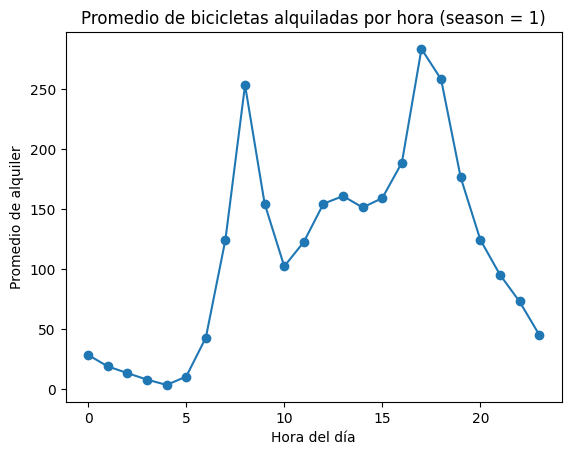

In [11]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 

bikes[bikes['season'] == 1].groupby('hour')['total'].mean().plot(
    title='Promedio de bicicletas alquiladas por hora (season = 1)',
    xlabel='Hora del día',
    ylabel='Promedio de alquiler',
    marker='o'
)

import matplotlib.pyplot as plt
plt.show()




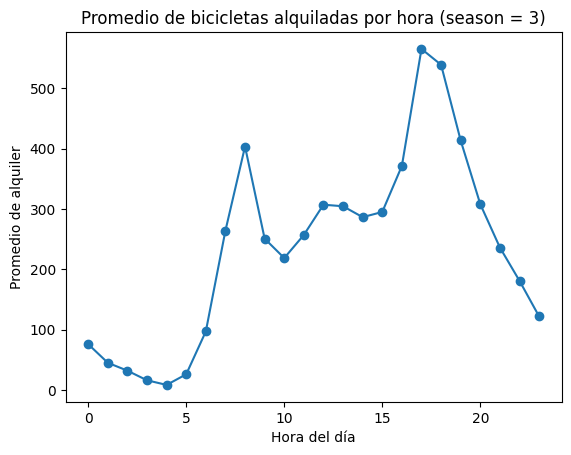

In [12]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes['season'] == 3].groupby('hour')['total'].mean().plot(
    title='Promedio de bicicletas alquiladas por hora (season = 3)',
    xlabel='Hora del día',
    ylabel='Promedio de alquiler',
    marker='o'
)

import matplotlib.pyplot as plt
plt.show()


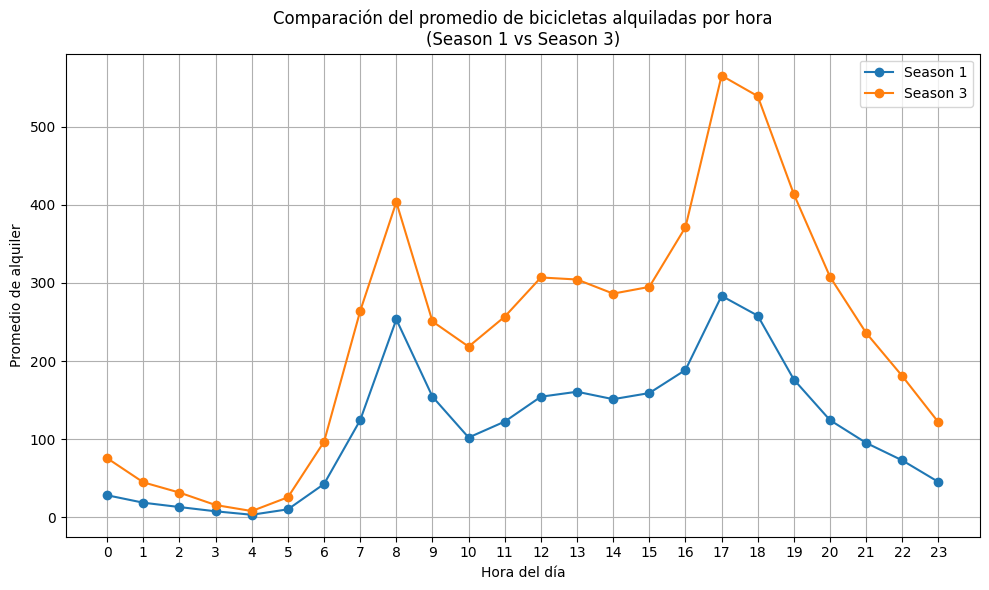

In [14]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.plot(comparacion['hour'], comparacion['total_season1'], label='Season 1', marker='o')
plt.plot(comparacion['hour'], comparacion['total_season3'], label='Season 3', marker='o')

# Personalización
plt.title('Comparación del promedio de bicicletas alquiladas por hora\n(Season 1 vs Season 3)')
plt.xlabel('Hora del día')
plt.ylabel('Promedio de alquiler')
plt.xticks(range(0, 24))  # Asegura que aparezcan todas las horas
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Hallazgos clave:

### 1. Mayor actividad general en `season = 3`
- En todas las horas del día, los promedios de alquiler en la temporada 3 son superiores a los de la temporada 1.
- Esto indica que durante la temporada 3 hay un uso más intensivo del sistema de bicicletas, tanto en horas pico como en horarios de menor demanda.

### 2. Picos horarios similares en ambas temporadas
- Ambos grupos presentan dos picos claros: uno en la mañana (alrededor de las 8:00 a.m.) y otro más pronunciado en la tarde (entre las 5:00 p.m. y 6:00 p.m.).
- En `season = 1`, el pico de las 17:00 tiene un promedio de 283 bicicletas, mientras que en `season = 3` alcanza los 565.
- Esto sugiere que el patrón de uso diario es consistente entre temporadas, pero amplificado en la temporada 3.

### 3. Diferencias porcentuales más marcadas en las tardes y noches
- Entre las 16:00 y las 21:00, la diferencia entre las dos temporadas es más significativa.
- Por ejemplo, a las 20:00, en `season = 1` se registran 124 bicicletas, mientras que en `season = 3` hay 307, lo cual representa un aumento de aproximadamente 147%.

### 4. Diferencia absoluta más alta
- La hora con mayor diferencia absoluta es las 17:00, con una diferencia de más de 280 bicicletas.




______________

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a un conjunto de train de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [28]:
# Celda 3

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Preparar los datos
X = bikes[['season', 'hour']]
y = bikes['total']

# 2. Convertir 'season' en variable categórica (one-hot encoding, sin primer nivel para evitar multicolinealidad)
X = pd.get_dummies(X, columns=['season'], drop_first=True)

# 3. Dividir en conjunto de entrenamiento y prueba (opcional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Imprimir coeficientes
coeficientes = pd.Series(model.coef_, index=X.columns)
print("Intercepto:", model.intercept_)
print("Coeficientes:")
print(coeficientes)





Intercepto: -5.919547341961589
Coeficientes:
hour         10.569619
season_2     99.106671
season_3    116.046340
season_4     84.944802
dtype: float64


### Resultados del modelo

- Intercepto: -5.92
- Coeficiente de `hour`: 10.57
- Coeficiente de `season_2`: 99.11
- Coeficiente de `season_3`: 116.05
- Coeficiente de `season_4`: 84.94

### Interpretación

- **Intercepto (-5.92):** Representa el valor estimado del total de bicicletas alquiladas cuando `hour = 0` y `season = 1`. Como no es realista tener un valor negativo de bicicletas, esto sugiere que el modelo no representa bien ese punto o que se requieren transformaciones adicionales.

- **`hour` (10.57):** Por cada hora que avanza el día, se espera un aumento promedio de aproximadamente 10.57 bicicletas alquiladas, manteniendo constante la temporada. Este resultado sugiere un patrón de crecimiento lineal, aunque en la realidad se ha observado que el uso tiene picos no lineales.

- **`season_2` (99.11):** En comparación con la temporada 1 (categoría base), durante la temporada 2 se espera un aumento promedio de 99 bicicletas alquiladas por hora, manteniendo constante la hora del día.

- **`season_3` (116.05):** La temporada 3 presenta el mayor incremento estimado: se esperan 116 bicicletas adicionales en promedio respecto a la temporada 1, lo cual coincide con los análisis descriptivos previos.

- **`season_4` (84.94):** También hay un aumento notable frente a la temporada 1, aunque menor que en las temporadas 2 y 3.

## Con lo anterior podemos decir que:

La variable `hour` tiene un efecto positivo sobre la cantidad de bicicletas alquiladas, y las temporadas 2, 3 y 4 están asociadas con una mayor demanda en comparación con la temporada 1. Sin embargo, estos resultados deben interpretarse con cautela debido a las limitaciones del modelo lineal frente a relaciones no lineales o interacciones complejas.

A continuación vamos a hacer la predicción de la regresion



R² del modelo: 0.2302


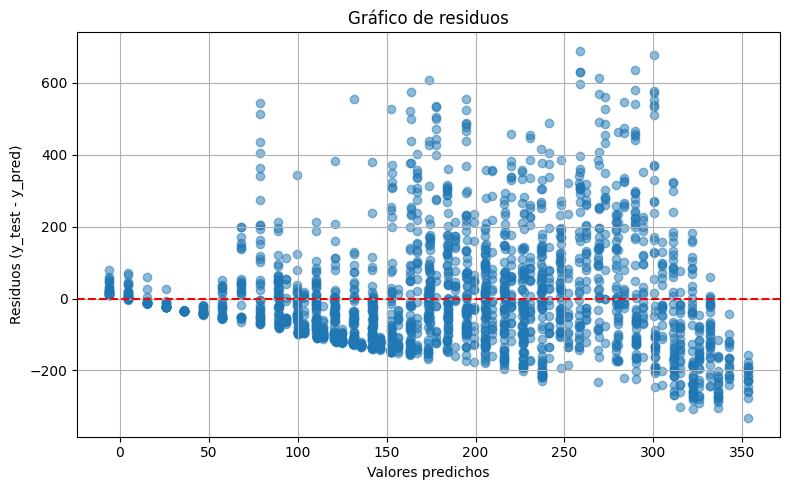

In [26]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# 1. Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# 2. Calcular el R²
r2 = r2_score(y_test, y_pred)
print(f'R² del modelo: {r2:.4f}')

# 3. Graficar residuos
residuos = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuos, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Gráfico de residuos')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos (y_test - y_pred)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Despues de correr el modelo podemos ver que:

Distribución no aleatoria: Se observa una forma de abanico invertido, lo que sugiere que la varianza de los errores no es constante (heterocedasticidad).

Patrones visibles: Los residuos tienden a agruparse con mayor dispersión para valores altos predichos, lo que indica que el modelo tiende a subestimar los valores grandes y sobrestimar algunos valores bajos.





________________________

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [29]:
# Celda 4


# Nodo raíz: todos los datos
print("Total promedio general:", bikes['total'].mean())

# Primera división: por hora (< 12 vs. >= 12)
nodo1 = bikes[bikes['hour'] < 12]
nodo2 = bikes[bikes['hour'] >= 12]

print("\nNodo 1: hour < 12")
print(nodo1['total'].mean())

print("\nNodo 2: hour >= 12")
print(nodo2['total'].mean())

# Segunda división: Nodo 1 → por season (1 vs. ≠ 1)
nodo1_1 = nodo1[nodo1['season'] == 1]
nodo1_2 = nodo1[nodo1['season'] != 1]

print("\nNodo 1.1: hour < 12 y season = 1")
print(nodo1_1['total'].mean())

print("\nNodo 1.2: hour < 12 y season ≠ 1")
print(nodo1_2['total'].mean())

# Segunda división: Nodo 2 → por hora (< 17 vs. >= 17)
nodo2_1 = nodo2[nodo2['hour'] < 17]
nodo2_2 = nodo2[nodo2['hour'] >= 17]

print("\nNodo 2.1: 12 <= hour < 17")
print(nodo2_1['total'].mean())

print("\nNodo 2.2: hour >= 17")
print(nodo2_2['total'].mean())

# Tercera división: Nodo 2.1 → por season (3 vs. ≠ 3)
nodo2_1_1 = nodo2_1[nodo2_1['season'] == 3]
nodo2_1_2 = nodo2_1[nodo2_1['season'] != 3]

print("\nNodo 2.1.1: 12 <= hour < 17 y season = 3")
print(nodo2_1_1['total'].mean())

print("\nNodo 2.1.2: 12 <= hour < 17 y season ≠ 3")
print(nodo2_1_2['total'].mean())

# Tercera división: Nodo 2.2 → por season (2 vs. ≠ 2)
nodo2_2_1 = nodo2_2[nodo2_2['season'] == 2]
nodo2_2_2 = nodo2_2[nodo2_2['season'] != 2]

print("\nNodo 2.2.1: hour >= 17 y season = 2")
print(nodo2_2_1['total'].mean())

print("\nNodo 2.2.2: hour >= 17 y season ≠ 2")
print(nodo2_2_2['total'].mean())





Total promedio general: 191.57413191254824

Nodo 1: hour < 12
118.34817140746213

Nodo 2: hour >= 12
264.0239400584795

Nodo 1.1: hour < 12 y season = 1
75.35128983308043

Nodo 1.2: hour < 12 y season ≠ 1
132.18359375

Nodo 2.1: 12 <= hour < 17
265.6820175438597

Nodo 2.2: hour >= 17
262.83959899749374

Nodo 2.1.1: 12 <= hour < 17 y season = 3
312.8140350877193

Nodo 2.1.2: 12 <= hour < 17 y season ≠ 3
249.97134502923976

Nodo 2.2.1: hour >= 17 y season = 2
304.88972431077696

Nodo 2.2.2: hour >= 17 y season ≠ 2
248.82289055973266


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [30]:
# Celda 5

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# 1. Preparación de los datos
X = bikes[['season', 'hour']]
y = bikes['total']

# Convertir 'season' a variables dummies
X = pd.get_dummies(X, columns=['season'], drop_first=True)

# 2. Dividir en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenar el árbol de decisión
tree = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)
tree.fit(X_train, y_train)

# 4. Evaluar el modelo
y_pred_tree = tree.predict(X_val)
r2_tree = r2_score(y_val, y_pred_tree)
print(f"R² del árbol de decisión: {r2_tree:.4f}")





R² del árbol de decisión: 0.5103


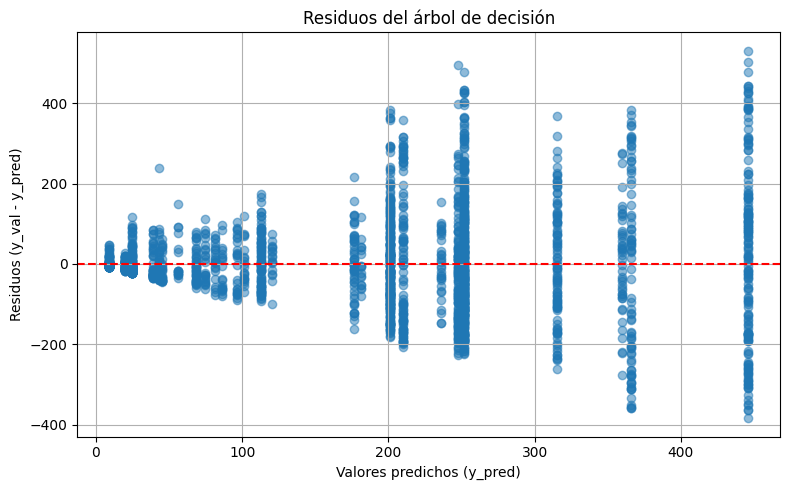

In [31]:
import matplotlib.pyplot as plt

residuos_tree = y_val - y_pred_tree

# Graficar residuos vs. valores predichos
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_tree, residuos_tree, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuos del árbol de decisión')
plt.xlabel('Valores predichos (y_pred)')
plt.ylabel('Residuos (y_val - y_pred)')
plt.grid(True)
plt.tight_layout()
plt.show()


### Árbol de decisión desempleño 

Se entrenó un árbol de decisión utilizando las variables predictoras `hour` y `season` (codificada como variables dummies). El modelo fue ajustado con los siguientes hiperparámetros:

- `max_depth = 5`
- `min_samples_leaf = 10`

**Resultado:**
- R² en conjunto de validación: **0.5103**

Este resultado indica que el árbol explica aproximadamente el **51% de la variabilidad** en el número de bicicletas alquiladas (`total`), lo cual es un desempeño razonablemente bueno considerando que solo se están usando dos variables.

---

### Regresión lineal (Punto 3)

El modelo de regresión lineal entrenado con las mismas variables (`hour` y `season`) obtuvo:

- R² en conjunto de validación: **0.2302**

Esto significa que solo explica el **23% de la variabilidad** en los datos, lo que evidencia un **menor poder predictivo** frente al árbol de decisión.

---

### Comparación y conclusión

- El árbol de decisión tiene un **mejor desempeño** (R² = 0.51) que el modelo lineal (R² = 0.23).
- Esto se debe a que el árbol **capta relaciones no lineales** entre `hour` y `total`, así como patrones específicos por temporada, mientras que el modelo lineal asume una relación global constante.
- El árbol también tiene la ventaja de ser **interpretativo** mediante sus reglas si se visualiza.
- En este caso, la regresión lineal es demasiado restrictiva para representar la complejidad del comportamiento diario de uso de bicicletas.

________________

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [32]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [33]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [34]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [ ]:
# Celda 6



# Árbol de decisión con tres hiperparámetros ajustados
tree_clf = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=1
)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

# Regresión logística
log_clf = LogisticRegression(max_iter=1000, random_state=1)
log_clf.fit(X_train, y_train)
y_pred_log = log_clf.predict(X_test)

# Métricas
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree)

accuracy_log = accuracy_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

# Resultados
print("Árbol de decisión:")
print(f"Accuracy: {accuracy_tree:.4f}")
print(f"F1-Score: {f1_tree:.4f}")

print("\nRegresión logística:")
print(f"Accuracy: {accuracy_log:.4f}")
print(f"F1-Score: {f1_log:.4f}")






Árbol de decisión:
Accuracy: 0.6247
F1-Score: 0.6219

Regresión logística:
Accuracy: 0.6140
F1-Score: 0.6032


Se compararon dos modelos de clasificación supervisada —árbol de decisión y regresión logística— para predecir si una noticia es popular, usando como conjunto de datos el de Popularidad de Noticias Online. Se evaluaron con métricas estándar: **accuracy** y **F1-score**.

### Resultados

**Árbol de decisión (con hiperparámetros calibrados):**
- Accuracy: 0.6247
- F1-Score: 0.6219

**Regresión logística:**
- Accuracy: 0.6140
- F1-Score: 0.6032

### Interpretación

- El **árbol de decisión** supera ligeramente a la regresión logística en ambas métricas.
- La diferencia en el **F1-score** (0.6219 vs. 0.6032) sugiere que el árbol tiene un mejor equilibrio entre precisión y recall, lo cual es importante en problemas de clasificación binaria.
- El uso de hiperparámetros como `max_depth`, `min_samples_split` y `min_samples_leaf` ayudó a **mejorar el rendimiento del árbol** sin sobreajustar.
- La **regresión logística**, aunque más simple y lineal, ofrece un desempeño competitivo y sigue siendo útil como línea base.



____

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [ ]:
# Celda 7



# Inicializar arrays para almacenar predicciones
preds_depth = []
preds_leaf = []
preds_logreg = []

# 1. Primeros 100 modelos con max_depth=5
for _ in range(100):
    X_res, y_res = resample(X_train, y_train, random_state=None)
    model = DecisionTreeClassifier(max_depth=5, random_state=None)
    model.fit(X_res, y_res)
    preds = model.predict(X_test)
    preds_depth.append(preds)

# 2. Siguientes 100 modelos con min_samples_leaf=10
for _ in range(100):
    X_res, y_res = resample(X_train, y_train, random_state=None)
    model = DecisionTreeClassifier(min_samples_leaf=10, random_state=None)
    model.fit(X_res, y_res)
    preds = model.predict(X_test)
    preds_leaf.append(preds)

# 3. Últimos 100 modelos con regresión logística
for _ in range(100):
    X_res, y_res = resample(X_train, y_train, random_state=None)
    model = LogisticRegression(max_iter=1000, random_state=None)
    model.fit(X_res, y_res)
    preds = model.predict(X_test)
    preds_logreg.append(preds)

# Convertir listas en arrays
preds_depth = np.array(preds_depth)
preds_leaf = np.array(preds_leaf)
preds_logreg = np.array(preds_logreg)

# Obtener votación mayoritaria por fila (por observación)
# Promedio por fila > 0.5 => clase 1, si no, clase 0
def votar(predicciones):
    promedio = predicciones.mean(axis=0)
    return (promedio >= 0.5).astype(int)

# Predicciones de cada grupo
y_pred_depth = votar(preds_depth)
y_pred_leaf = votar(preds_leaf)
y_pred_logreg = votar(preds_logreg)

# Ensamble completo (300 modelos)
preds_all = np.vstack([preds_depth, preds_leaf, preds_logreg])
y_pred_ensemble = votar(preds_all)

# Evaluar
def evaluar(y_test, y_pred, nombre):
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{nombre}:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  F1-Score: {f1:.4f}\n")

# Resultados individuales
evaluar(y_test, y_pred_depth, "Árboles (max_depth)")
evaluar(y_test, y_pred_leaf, "Árboles (min_samples_leaf)")
evaluar(y_test, y_pred_logreg, "Regresiones logísticas")

# Resultado del ensamble total (300 modelos)
evaluar(y_test, y_pred_ensemble, "Ensamble final (votación mayoritaria de 300 modelos)")






Árboles (max_depth):
  Accuracy: 0.6567
  F1-Score: 0.6578

Árboles (min_samples_leaf):
  Accuracy: 0.6480
  F1-Score: 0.6480

Regresiones logísticas:
  Accuracy: 0.6160
  F1-Score: 0.6049

Ensamble final (votación mayoritaria de 300 modelos):
  Accuracy: 0.6353
  F1-Score: 0.6266



- Los árboles de decisión con `max_depth=5` fueron los modelos individuales con mejor desempeño (F1: 0.6578).
- Los árboles con `min_samples_leaf=10` también mostraron buen rendimiento (F1: 0.6480).
- Las regresiones logísticas fueron el grupo con menor desempeño individual (F1: 0.6049).
- El ensamble por votación mayoritaria logró un F1-Score de 0.6266, que es **inferior al mejor grupo individual**, pero representa una combinación estable entre los tres enfoques.
- La votación mayoritaria tiende a suavizar errores individuales, lo que permite reducir el sobreajuste, aunque no siempre mejora respecto al mejor modelo.



_____

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [37]:
# Celda 8
# 1. Calcular la probabilidad (promedio) de predicción positiva por grupo
prob_depth = preds_depth.mean(axis=0)
prob_leaf = preds_leaf.mean(axis=0)
prob_logreg = preds_logreg.mean(axis=0)

# 2. Votación ponderada (pesos iguales 1/3 por grupo)
voto_ponderado = (prob_depth * 1/3) + (prob_leaf * 1/3) + (prob_logreg * 1/3)

# 3. Aplicar umbral para clasificar (>= 0.5 → clase 1)
y_pred_weighted = (voto_ponderado >= 0.5).astype(int)

# 4. Evaluar desempeño
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
f1_weighted = f1_score(y_test, y_pred_weighted)

# 5. Imprimir resultados
print("Ensamble con votación ponderada (pesos iguales):")
print(f"Accuracy: {accuracy_weighted:.4f}")
print(f"F1-Score: {f1_weighted:.4f}")


Ensamble con votación ponderada (pesos iguales):
Accuracy: 0.6353
F1-Score: 0.6266


- La votación ponderada con pesos iguales produjo exactamente los mismos resultados que la votación mayoritaria:
  - Accuracy: 0.6353
  - F1-Score: 0.6266
- Esto indica que, en este caso, la distribución de predicciones fue tal que el peso proporcional de cada grupo no cambió el resultado respecto a una votación simple.
- Aunque no se obtuvo mejora frente a la votación mayoritaria, la votación ponderada ofrece una alternativa útil cuando se desea reflejar diferentes niveles de confianza o desempeño entre grupos de modelos.


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

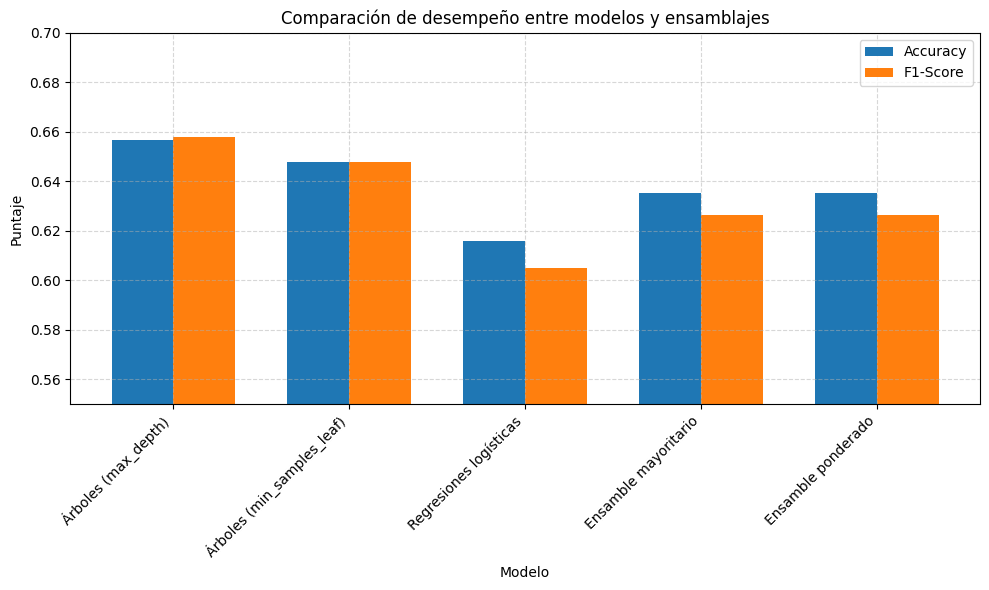

In [ ]:
# Celda 9


# Resultados de Accuracy y F1-Score para cada grupo
nombres_modelos = [
    "Árboles (max_depth)",
    "Árboles (min_samples_leaf)",
    "Regresiones logísticas",
    "Ensamble mayoritario",
    "Ensamble ponderado"
]

accuracy = [0.6567, 0.6480, 0.6160, 0.6353, 0.6353]
f1 = [0.6578, 0.6480, 0.6049, 0.6266, 0.6266]

# Crear gráfico de barras agrupadas
x = np.arange(len(nombres_modelos))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, accuracy, width, label='Accuracy')
plt.bar(x + width/2, f1, width, label='F1-Score')

plt.xlabel('Modelo')
plt.ylabel('Puntaje')
plt.title('Comparación de desempeño entre modelos y ensamblajes')
plt.xticks(ticks=x, labels=nombres_modelos, rotation=45, ha='right')
plt.ylim(0.55, 0.70)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



Tanto la votación mayoritaria (Punto 7) como la votación ponderada (Punto 8) produjeron exactamente el mismo resultado en términos de desempeño:

- **Accuracy**: 0.6353
- **F1-Score**: 0.6266

Esto se debe a que los tres grupos de modelos (árboles con `max_depth`, árboles con `min_samples_leaf` y regresiones logísticas) contribuyeron de forma equilibrada en sus predicciones, y la proporción de modelos que votaban por la clase "1" fue suficientemente parecida para que la decisión final no variara entre ambas metodologías.

A pesar de que los árboles con `max_depth=5` alcanzaron el mejor desempeño individual (F1-Score: 0.6578), el ensamble completo resultó en un valor intermedio, lo cual es consistente con el principio de que los ensambles tienden a estabilizar los errores individuales y reducir el sobreajuste.

---

### Comparación entre votación mayoritaria y votación ponderada

- **Votación mayoritaria** toma en cuenta únicamente la frecuencia con que una clase es predicha, sin importar qué modelos votan.
- **Votación ponderada** asigna importancia a los grupos de modelos, permitiendo influir en la predicción final de acuerdo con el peso asignado a cada grupo.

En este caso, como se usaron **pesos iguales (1/3)** para la votación ponderada, el resultado fue idéntico al de la votación mayoritaria. Sin embargo, si se hubieran usado **pesos basados en desempeño** (por ejemplo, asignando más peso a los modelos con mayor F1-Score), los resultados podrían haber sido diferentes.

---

### Ventajas y desventajas de cada método

**Votación mayoritaria**
- *Ventajas*:
  - Simple de implementar y entender.
  - Robusta ante modelos débiles si hay diversidad.
- *Desventajas*:
  - Trata a todos los modelos por igual, incluso si su desempeño individual es bajo.
  - No permite incorporar información adicional sobre calidad de los modelos.

**Votación ponderada**
- *Ventajas*:
  - Permite controlar el impacto de cada grupo de modelos.
  - Puede mejorar resultados si los pesos se basan en desempeño.
- *Desventajas*:
  - Requiere elegir o estimar los pesos correctamente.
  - Puede ser sensible a la mala calibración de los modelos.

---



Ambas metodologías generaron un desempeño equilibrado, y el ensamble resultó útil para estabilizar las predicciones. En contextos donde se desea mayor control o diferenciación entre tipos de modelos, la **votación ponderada** ofrece más flexibilidad. En cambio, si se busca una solución rápida y robusta, la **votación mayoritaria** puede ser más conveniente.
